<a href="https://colab.research.google.com/github/Tea-Yeon-Kim/AI-Class/blob/main/week7/BP_data_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

In [ ]:
import requests

url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/BP_data.csv"
response = requests.get(url)

with open('BP_data.csv', 'wb') as file:
    file.write(response.content)

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

data = pd.read_csv(url, index_col=0)
data

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
Patient_Number,,,,,,,,,,,,,,
1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1


In [ ]:
data.columns

Index(['Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [ ]:
# 결측치 확인
missing_values = data.isnull().sum()

print("\n결측치 개수:")
print(missing_values)


결측치 개수:
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64


In [ ]:
# 1. Genetic_Pedigree_Coefficient
data['Genetic_Pedigree_Coefficient'] = data['Genetic_Pedigree_Coefficient'].fillna(
    data['Genetic_Pedigree_Coefficient'].median()
)

# 2. Pregnancy (성별 기반 처리)
data.drop(columns=['Pregnancy'], inplace=True)

# 3. alcohol_consumption_per_day (결측 여부 + 중앙값 대체)
data['alcohol_na'] = data['alcohol_consumption_per_day'].isna().astype(int)

data['alcohol_consumption_per_day'] = data['alcohol_consumption_per_day'].fillna(
    data['alcohol_consumption_per_day'].median()
)

In [ ]:
# 결측치 확인
missing_values = data.isnull().sum()

print("\n결측치 개수:")
print(missing_values)


결측치 개수:
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
alcohol_na                       0
dtype: int64


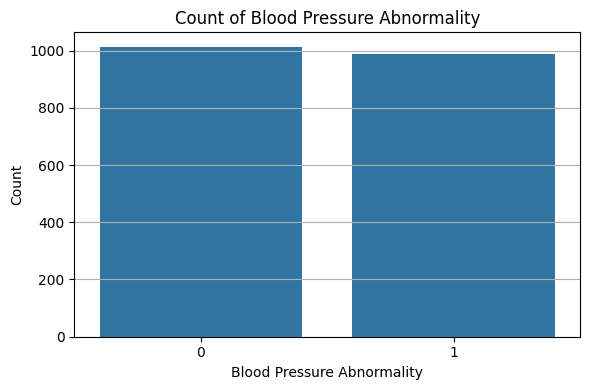

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Blood_Pressure_Abnormality', data=data)


plt.title("Count of Blood Pressure Abnormality")
plt.xlabel("Blood Pressure Abnormality")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

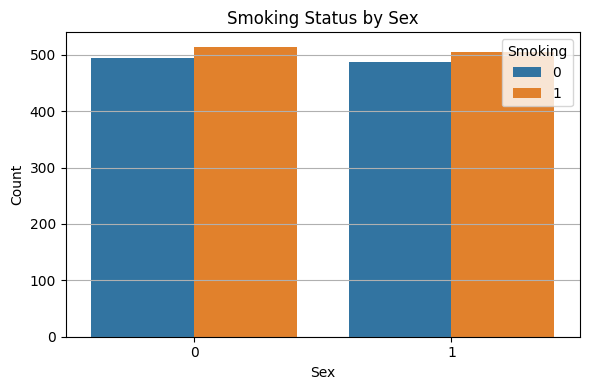

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Smoking', data=data)

plt.title("Smoking Status by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Smoking")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


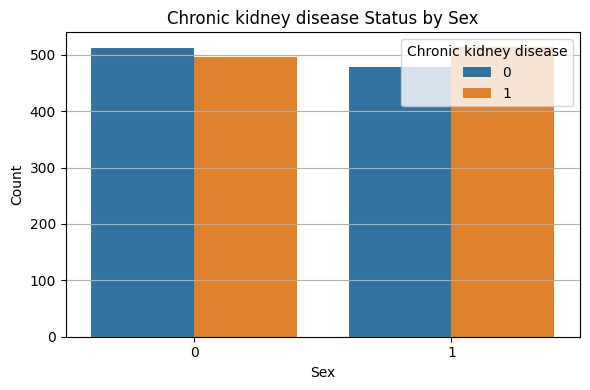

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Chronic_kidney_disease', data=data)

plt.title("Chronic kidney disease Status by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Chronic kidney disease")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


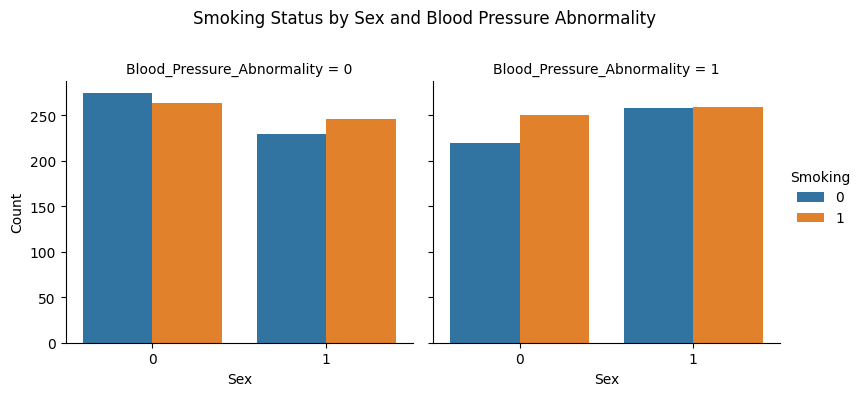

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    data=data,
    kind="count",
    x="Sex",
    hue="Smoking",
    col="Blood_Pressure_Abnormality",
    height=4,
    aspect=1
)

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Smoking Status by Sex and Blood Pressure Abnormality")
g.set_axis_labels("Sex", "Count")
g._legend.set_title("Smoking")

plt.show()


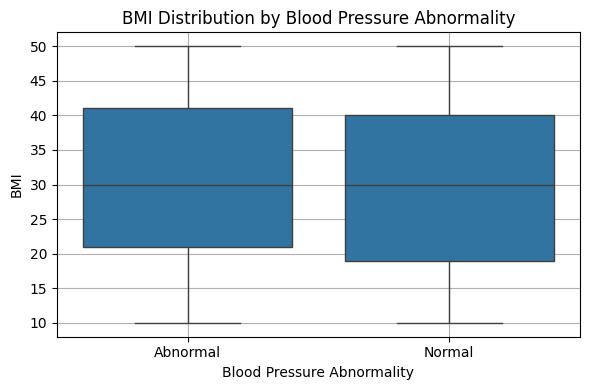

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 복사하고 label 영어로 매핑
df = data.copy()
df['Blood_Pressure_Abnormality'] = df['Blood_Pressure_Abnormality'].map({0: 'Normal', 1: 'Abnormal'})

# Box Plot for BMI
plt.figure(figsize=(6, 4))
sns.boxplot(x='Blood_Pressure_Abnormality', y='BMI', data=df)

plt.title("BMI Distribution by Blood Pressure Abnormality")
plt.xlabel("Blood Pressure Abnormality")
plt.ylabel("BMI")
plt.grid(True)
plt.tight_layout()
plt.show()


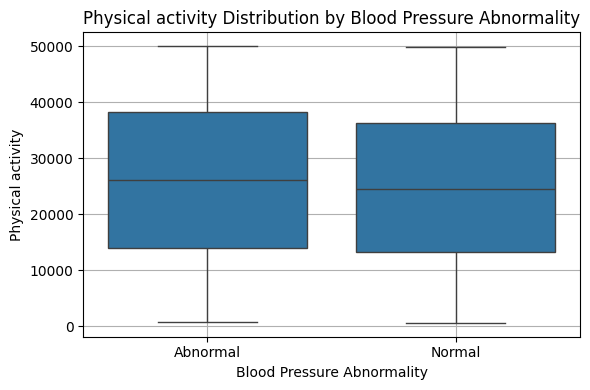

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# label 값 텍스트로 변환 (0 → Normal, 1 → Abnormal)
df = data.copy()
df['Blood_Pressure_Abnormality'] = df['Blood_Pressure_Abnormality'].map({0: 'Normal', 1: 'Abnormal'})

# box plot 그리기
plt.figure(figsize=(6, 4))
sns.boxplot(x='Blood_Pressure_Abnormality', y='Physical_activity', data=df)

plt.title("Physical activity Distribution by Blood Pressure Abnormality")
plt.xlabel("Blood Pressure Abnormality")
plt.ylabel("Physical activity")
plt.grid(True)
plt.tight_layout()
plt.show()

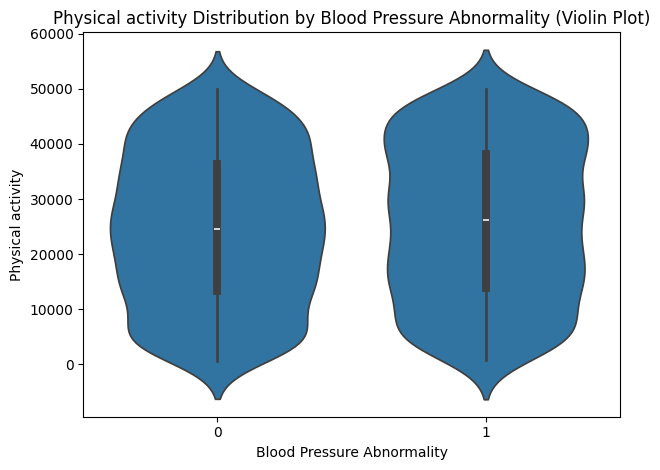

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: 혈압 상태별 BMI 분포
sns.violinplot(x='Blood_Pressure_Abnormality', y='Physical_activity', data=data)

plt.title("Physical activity Distribution by Blood Pressure Abnormality (Violin Plot)")
plt.xlabel("Blood Pressure Abnormality")
plt.ylabel("Physical activity")
plt.tight_layout()
plt.show()


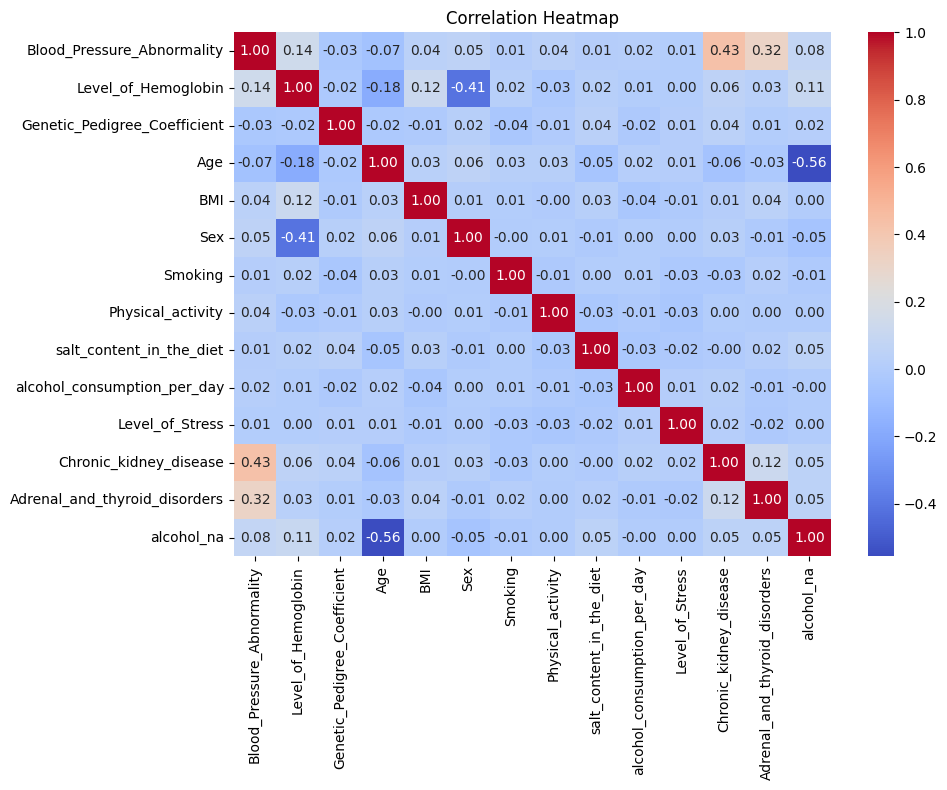

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 데이터만 추출
numeric_df = data.select_dtypes(include='number')

# 상관계수 계산
corr = numeric_df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


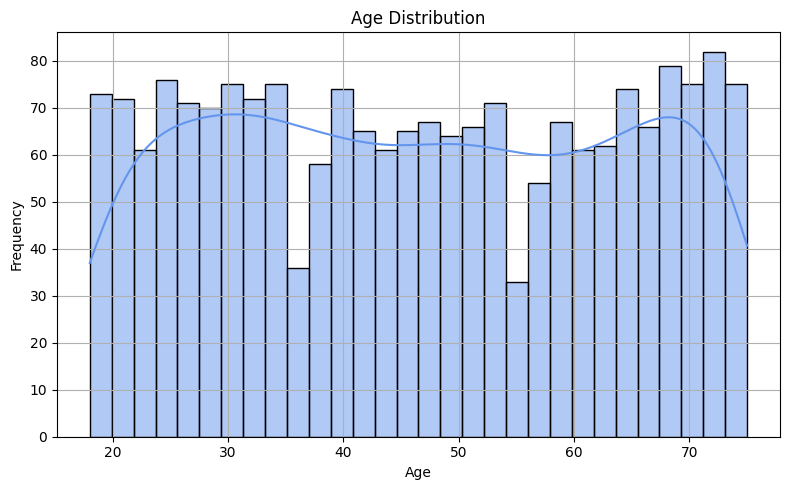

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True, bins=30, color='cornflowerblue')

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


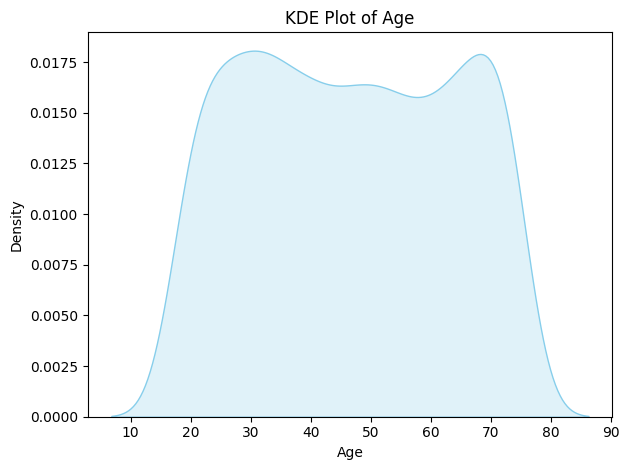

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data['Age'], fill=True, color='skyblue')
plt.title("KDE Plot of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


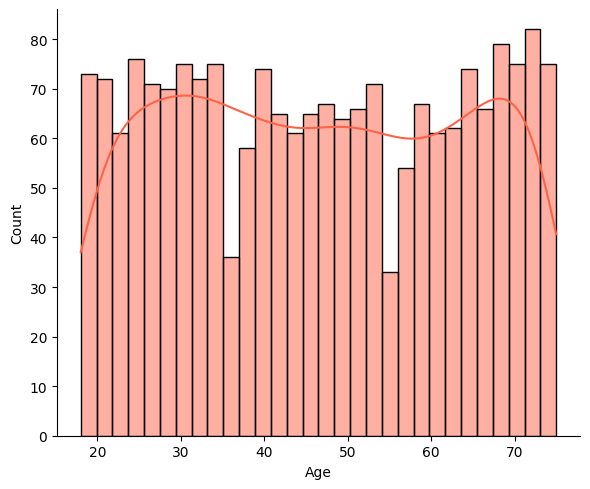

In [ ]:
sns.displot(data['Age'], kde=True, bins=30, color='tomato', height=5, aspect=1.2)


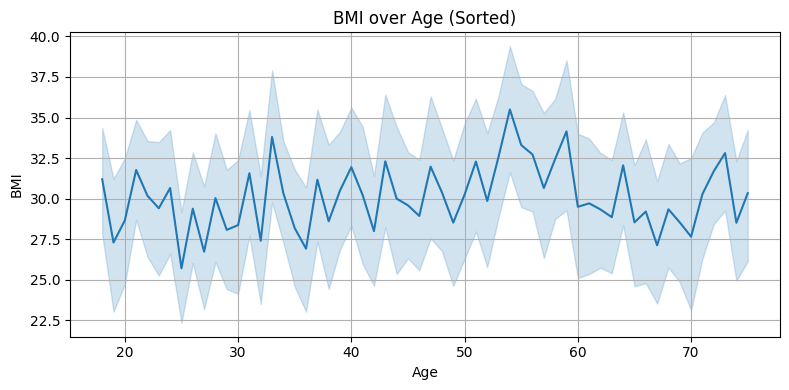

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 나이순 정렬
sorted_data = data.sort_values(by='Age')

# 선 그래프 그리기
plt.figure(figsize=(8, 4))
sns.lineplot(x=sorted_data['Age'], y=sorted_data['BMI'])

plt.title("BMI over Age (Sorted)")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-19-d2775398a75b>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Age_bin')['BMI'].mean().reset_index()


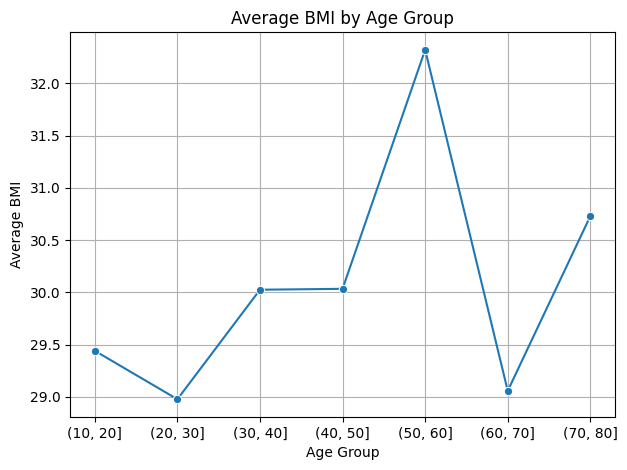

In [ ]:
# Age를 10살 단위로 binning
df['Age_bin'] = pd.cut(data['Age'], bins=range(0, 101, 10))

# 구간별 평균 BMI 계산
grouped = df.groupby('Age_bin')['BMI'].mean().reset_index()

# 문자열 변환 (for x축)
grouped['Age_bin'] = grouped['Age_bin'].astype(str)

# lineplot
sns.lineplot(x='Age_bin', y='BMI', data=grouped, marker='o')

plt.title("Average BMI by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average BMI")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-20-bd5524495882>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bp_ratio = df.groupby('Age_bin')['Blood_Pressure_Abnormality'].mean().reset_index()


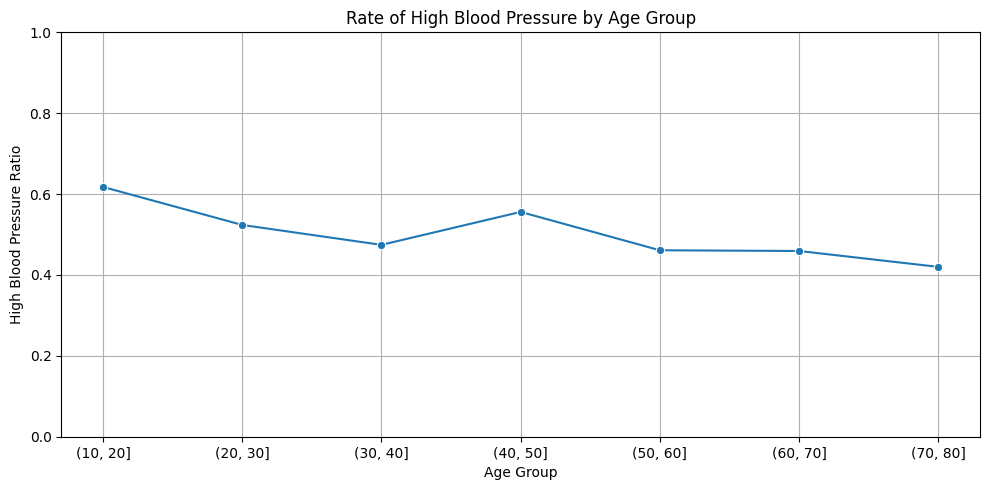

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = data.copy()

# 나이를 10살 단위로 나눔 (0~100세 구간)
df['Age_bin'] = pd.cut(data['Age'], bins=range(0, 101, 10))

# 각 연령대에서 고혈압 비율 계산
bp_ratio = df.groupby('Age_bin')['Blood_Pressure_Abnormality'].mean().reset_index()

# x축 문자열로 변환 (예: (30, 40] → '30-40')
bp_ratio['Age_bin'] = bp_ratio['Age_bin'].astype(str)

# 시각화
plt.figure(figsize=(10, 5))
sns.lineplot(x='Age_bin', y='Blood_Pressure_Abnormality', data=bp_ratio, marker='o')

plt.title("Rate of High Blood Pressure by Age Group")
plt.xlabel("Age Group")
plt.ylabel("High Blood Pressure Ratio")
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

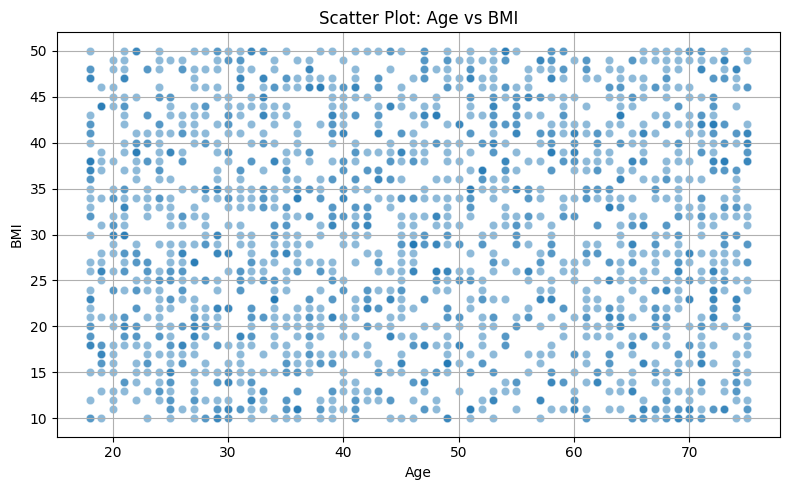

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='BMI', data=data, alpha=0.5)

plt.title("Scatter Plot: Age vs BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.grid(True)
plt.tight_layout()
plt.show()


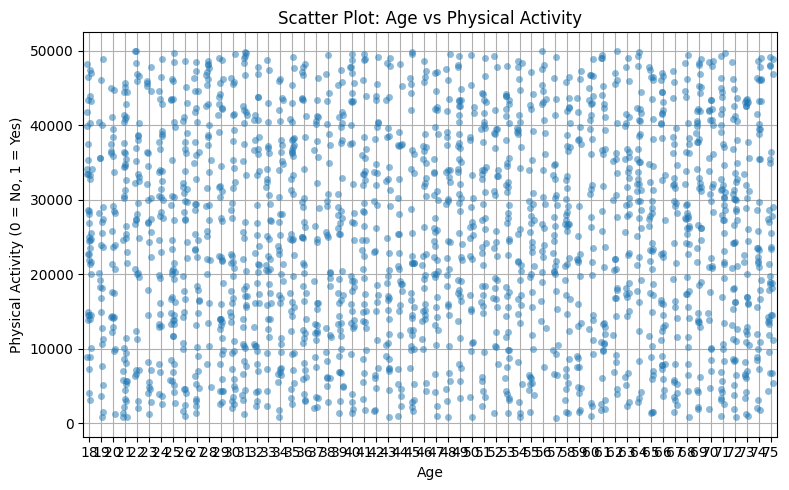

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.stripplot(x='Age', y='Physical_activity', data=data, jitter=0.2, alpha=0.5)

plt.title("Scatter Plot: Age vs Physical Activity")
plt.xlabel("Age")
plt.ylabel("Physical Activity (0 = No, 1 = Yes)")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-24-dcc033af25e1>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salt_avg = df.groupby('Age_bin')['salt_content_in_the_diet'].mean().reset_index()


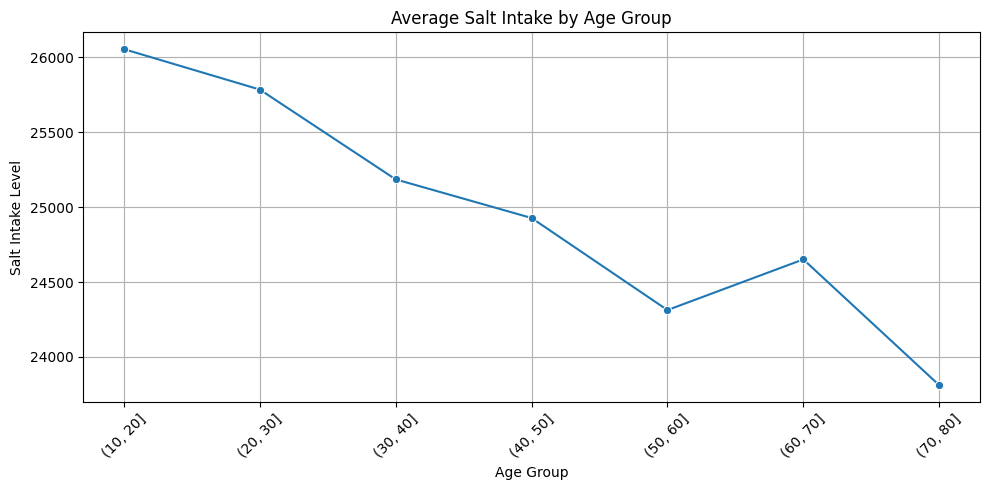

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = data.copy()

# 1. 나이를 10살 단위로 구간화
df['Age_bin'] = pd.cut(df['Age'], bins=range(0, 101, 10))

# 2. 연령대별 평균 소금 섭취량 계산
salt_avg = df.groupby('Age_bin')['salt_content_in_the_diet'].mean().reset_index()

# 3. x축 구간 문자열로 변환
salt_avg['Age_bin'] = salt_avg['Age_bin'].astype(str)

# 4. 선 그래프
plt.figure(figsize=(10, 5))
sns.lineplot(x='Age_bin', y='salt_content_in_the_diet', data=salt_avg, marker='o')

plt.title("Average Salt Intake by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Salt Intake Level")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-25-17e812e38dc7>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salt_avg = df.groupby('Age_bin')['salt_content_in_the_diet'].mean().reset_index()
<ipython-input-25-17e812e38dc7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_bin', y='salt_content_in_the_diet', data=salt_avg, palette='Blues')


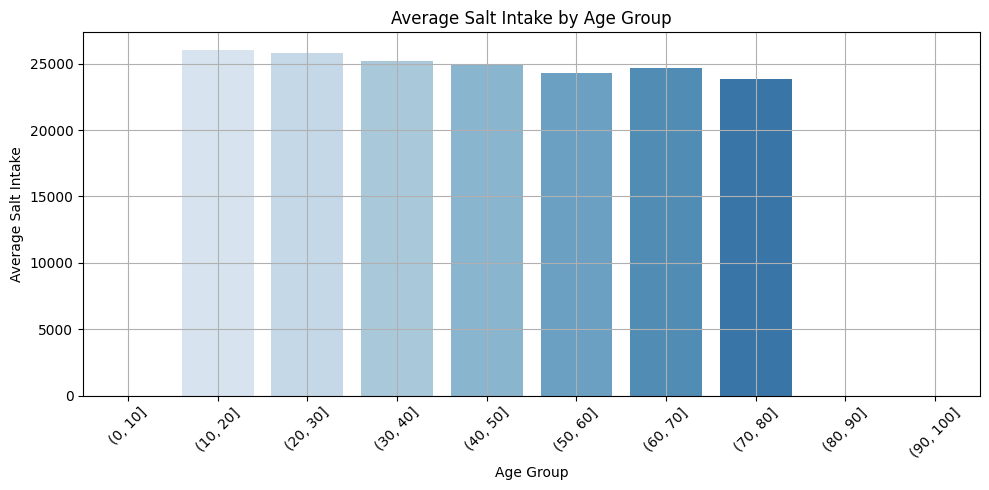

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Age 구간 나누기 (10살 단위)
df['Age_bin'] = pd.cut(data['Age'], bins=range(0, 101, 10))

# 연령대별 평균 소금 섭취량 계산
salt_avg = df.groupby('Age_bin')['salt_content_in_the_diet'].mean().reset_index()

# x축 문자열로 변환
salt_avg['Age_bin'] = salt_avg['Age_bin'].astype(str)

# barplot 그리기
plt.figure(figsize=(10, 5))
sns.barplot(x='Age_bin', y='salt_content_in_the_diet', data=salt_avg, palette='Blues')

plt.title("Average Salt Intake by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Salt Intake")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
# 데이터와 타겟 분리
X = data.drop('Blood_Pressure_Abnormality', axis=1).values
y = data['Blood_Pressure_Abnormality'].values

In [49]:
X

array([[11.28,  0.9 , 34.  , ...,  1.  ,  1.  ,  1.  ],
       [ 9.75,  0.23, 54.  , ...,  0.  ,  0.  ,  0.  ],
       [10.79,  0.91, 70.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [16.91,  0.22, 18.  , ...,  1.  ,  1.  ,  1.  ],
       [11.15,  0.72, 46.  , ...,  0.  ,  1.  ,  0.  ],
       [11.36,  0.09, 41.  , ...,  1.  ,  0.  ,  0.  ]])

In [50]:
y

array([1, 0, 1, ..., 1, 0, 1])

In [51]:


# (3) 이제 표준화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# (4) train/test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
X

array([[-0.19670848,  1.42310249, -0.73426258, ...,  0.9900495 ,
         1.12017473,  2.69526674],
       [-0.89656771, -0.92881391,  0.435085  , ..., -1.0100505 ,
        -0.89271787, -0.37102079],
       [-0.4208464 ,  1.45820572,  1.37056306, ...,  0.9900495 ,
        -0.89271787, -0.37102079],
       ...,
       [ 2.37859055, -0.96391714, -1.66974063, ...,  0.9900495 ,
         1.12017473,  2.69526674],
       [-0.25617364,  0.79124435, -0.03265403, ..., -1.0100505 ,
         1.12017473, -0.37102079],
       [-0.16011453, -1.42025913, -0.32499092, ...,  0.9900495 ,
        -0.89271787, -0.37102079]])

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((1600, 13), (400, 13), (1600,), (400,))

In [55]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [56]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 13]),
 torch.Size([400, 13]),
 torch.Size([1600]),
 torch.Size([400]))

In [57]:
class BP_data_Dense(nn.Module):
    def __init__(self):
        super(BP_data_Dense, self).__init__()
        self.fc1 = nn.Linear(13, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = BP_data_Dense()

In [58]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [59]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 0.6658, Accuracy: 69.75%
Epoch 2/20, Loss: 0.5712, Accuracy: 74.25%
Epoch 3/20, Loss: 0.5187, Accuracy: 77.75%
Epoch 4/20, Loss: 0.4870, Accuracy: 79.50%
Epoch 5/20, Loss: 0.4560, Accuracy: 81.00%
Epoch 6/20, Loss: 0.4151, Accuracy: 85.00%
Epoch 7/20, Loss: 0.3759, Accuracy: 85.50%
Epoch 8/20, Loss: 0.3443, Accuracy: 89.00%
Epoch 9/20, Loss: 0.3213, Accuracy: 90.00%
Epoch 10/20, Loss: 0.3139, Accuracy: 89.00%
Epoch 11/20, Loss: 0.2997, Accuracy: 89.50%
Epoch 12/20, Loss: 0.2899, Accuracy: 89.00%
Epoch 13/20, Loss: 0.2817, Accuracy: 89.50%
Epoch 14/20, Loss: 0.2760, Accuracy: 90.25%
Epoch 15/20, Loss: 0.2693, Accuracy: 91.00%
Epoch 16/20, Loss: 0.2670, Accuracy: 90.25%
Epoch 17/20, Loss: 0.2559, Accuracy: 90.75%
Epoch 18/20, Loss: 0.2548, Accuracy: 90.00%
Epoch 19/20, Loss: 0.2509, Accuracy: 90.25%
Epoch 20/20, Loss: 0.2474, Accuracy: 90.75%
Training complete.


In [60]:
# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[187  21]
 [ 16 176]]
F1 Score: 0.91
Precision: 0.91
Recall: 0.91
Specificity: 0.91


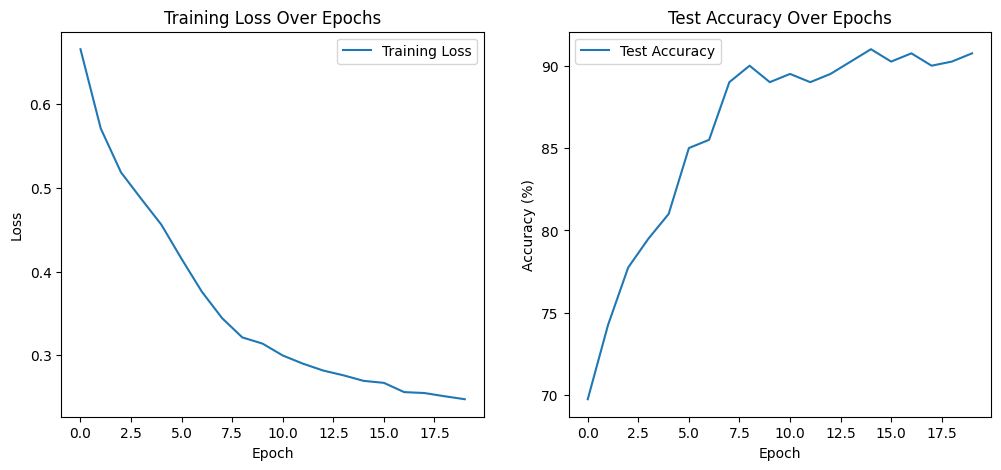

In [61]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()

In [62]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score

# Feature / Label 분리
X = pd.get_dummies(data.drop(columns=['Blood_Pressure_Abnormality']))
y = data['Blood_Pressure_Abnormality']

# 모델 및 교차 검증
model = LogisticRegression(max_iter=1000)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = cross_val_score(model, X, y, cv=skf, scoring=make_scorer(f1_score))

print("Fold별 F1 Score:", f1_scores)
print("평균 F1 Score:", f1_scores.mean())

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Fold별 F1 Score: [0.70528967 0.73067916 0.6751269  0.72222222 0.73349633]
평균 F1 Score: 0.713362857549321


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
